# Visualizing Time Series Data of Euro Exchange Rates

## Step #1: Introducing the dataset

In [1]:
# Import pandas library, read dataset in, and print first/last five rows
import pandas as pd

exchange_rates = pd.read_csv("_data/euro-daily-hist_1999_2022.csv")

exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-04-08,1.4552,1.9558,5.1583,1.3675,1.0155,6.9115,NaN,24.479,7.4372,...,4.9425,NaN,10.2768,1.4801,NaN,NaN,36.4880,16.0237,1.0861,15.9968
1,2022-04-07,1.4578,1.9558,5.1460,1.3704,1.0185,6.9448,NaN,24.512,7.4378,...,4.9419,NaN,10.3130,1.4848,NaN,NaN,36.5410,16.0929,1.0916,16.0520
2,2022-04-06,1.4431,1.9558,5.0996,1.3647,1.0187,6.9498,NaN,24.441,7.4378,...,4.9433,NaN,10.2855,1.4844,NaN,NaN,36.7010,16.0998,1.0923,15.9934
3,2022-04-05,1.4374,1.9558,5.0384,1.3647,1.0141,6.9783,NaN,24.338,7.4378,...,4.9438,NaN,10.2593,1.4867,NaN,NaN,36.6970,16.1500,1.0969,15.9529
4,2022-04-04,1.4651,1.9558,5.1162,1.3749,1.0203,7.0026,NaN,24.320,7.4385,...,4.9432,NaN,10.3849,1.4938,NaN,NaN,36.8940,16.1830,1.1005,16.0957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6018,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6019,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6020,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [2]:
# Get information of dataset
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6022 non-null   object 
 1   [Australian dollar ]      6022 non-null   object 
 2   [Bulgarian lev ]          5620 non-null   object 
 3   [Brazilian real ]         5754 non-null   object 
 4   [Canadian dollar ]        6022 non-null   object 
 5   [Swiss franc ]            6022 non-null   object 
 6   [Chinese yuan renminbi ]  5754 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6022 non-null   object 
 9   [Danish krone ]           6022 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6022 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6022 non-null   object 
 14  [Croatia

## Step #2: Cleaning the dataset

In [3]:
# Rename two columns, change time field to `datetime` type,
# Sort time field in ascending order, and reset index
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
# Isolate time and US dollar data
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

# Look at frequency distribution of US dollar
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
0.8824     1
1.3623     1
1.3683     1
1.3322     1
1.1051     1
Name: US_dollar, Length: 3595, dtype: int64

In [5]:
# Remove invalid US dollar rows and change to float type
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

# Confirm the two changes above
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 6021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5960 non-null   datetime64[ns]
 1   US_dollar  5960 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.7 KB


## Step #3: Initial Time Series Plot

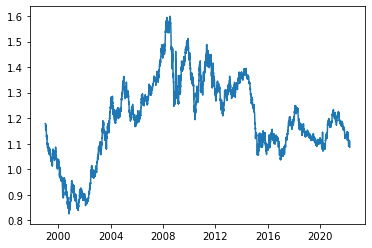

In [6]:
# Import matplotlib and enable Jupyter to display graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Line plot of euro to dollar exchange rate over time
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

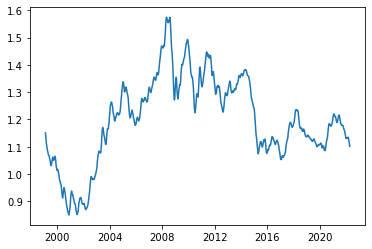

In [7]:
# Create new field of 30-day rolling averages
euro_to_dollar['rolling_mean_30'] = euro_to_dollar['US_dollar'].rolling(30).mean()

# Line plot of 30-day rolling averages
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean_30'])
plt.show()

## Step #4: Euro-USD Exchange Rates before/after COVID Pandemic

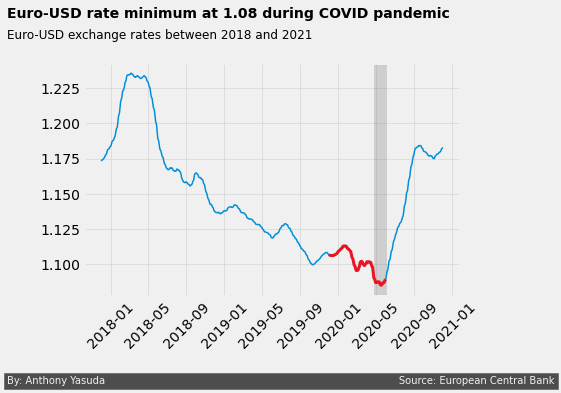

In [8]:
# Import matplotlib style library
import matplotlib.style as style

# Use fivethirtyeight style
# style.use('default')
style.use('fivethirtyeight')

# Initialize figure and subplot axes
fig, ax = plt.subplots()

# Create two limited datasets from the original, one to be highlighted and one for overall time series
euro_to_dollar_lim1 = euro_to_dollar[(euro_to_dollar['Time'] >= '2017-12') & (euro_to_dollar['Time'] <= '2020-12')]
euro_to_dollar_lim2 = euro_to_dollar[(euro_to_dollar['Time'] >= '2019-12') & (euro_to_dollar['Time'] <= '2020-06')]

# Plot overall time series with narrow line
ax.plot(euro_to_dollar_lim1['Time'],
        euro_to_dollar_lim1['rolling_mean_30'],
        linewidth=1.5)

# Highlight start of COVID and low exchange rates with thicker line and red color
ax.plot(euro_to_dollar_lim2['Time'],
        euro_to_dollar_lim2['rolling_mean_30'],
        linewidth=3, color='#EE1324')

# Enclose minimum exchange rate range with grey vertical bar
ax.axvspan(xmin=18375, xmax=18414, ymin=0, alpha=0.3, color='grey')

# Angle the x-axis labels to avoid overlap
ax.tick_params(axis='x', rotation=45)

ax.text(17200, 1.275, "Euro-USD rate minimum at 1.08 during COVID pandemic",
        weight='bold')
ax.text(17200, 1.26, 'Euro-USD exchange rates between 2018 and 2021',
        size=12)

# Add a signature
ax.text(17200, 1.015, 'By: Anthony Yasuda' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

In [9]:
euro_to_dollar_lim1.min()

Time               2017-12-01 00:00:00
US_dollar                       1.0707
rolling_mean_30               1.084997
dtype: object